In [216]:
import pandas as pd
from sklearn.datasets import load_iris

iris_ds = load_iris(as_frame=True)

In [217]:
X = iris_ds.data
y = iris_ds.target

X.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

df = X.copy()
df['target']=y
df['species']=iris_ds.target_names[y]

Check dataset for NaNs and etc.

In [230]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

In [238]:
df['target'].value_counts(normalize=True)

target
0    0.333333
1    0.333333
2    0.333333
Name: proportion, dtype: float64

Check mean values of each feature for every species

In [233]:
df.groupby('species').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


<Axes: xlabel='sepal width (cm)', ylabel='sepal length (cm)'>

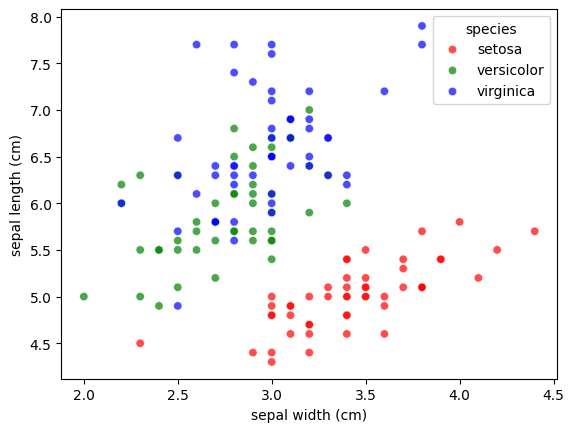

In [228]:
sns.scatterplot(data=df, x='sepal width (cm)', y='sepal length (cm)', hue='species', legend='auto', alpha=0.7, palette=['red','green','blue'])

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

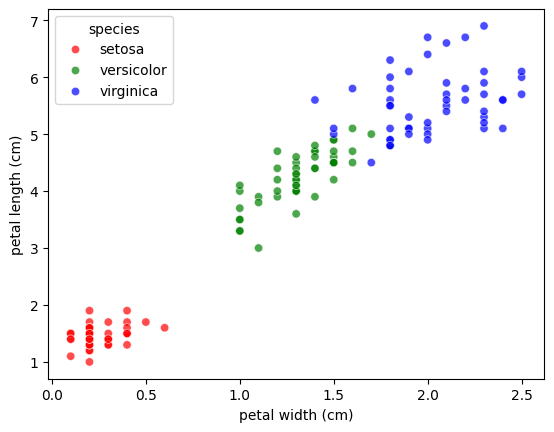

In [229]:
sns.scatterplot(data=df, x='petal width (cm)', y='petal length (cm)', hue='species', legend='auto', alpha=0.7, palette=['red','green','blue'])

In [221]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, shuffle=True, stratify=y, test_size=0.33)

In [222]:
X_train.shape

(100, 4)

In [223]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

model = make_pipeline(
    StandardScaler(),
    OneVsOneClassifier(LinearSVC(max_iter=10000, random_state=42))
)
model.fit(X_train, y_train)

,steps,"[('standardscaler', ...), ('onevsoneclassifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,estimator,LinearSVC(max...ndom_state=42)
,n_jobs,None
,penalty,'l2'
,loss,'squared_hinge'


In [224]:
y_hat = model.predict(X_test)

Accuracy

In [225]:
import numpy as np
from sklearn.metrics import accuracy_score
print(accuracy_score(y_true=y_test, y_pred=y_hat))

0.96


Cross-Validation

In [226]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=3)
scores.mean(), scores.std()

(np.float64(0.98), np.float64(0.016329931618554536))